In [1]:
import sys
import time
sys.path.append("..")
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.gridspec as gridspec

from scipy import fft


import lauetools.LaueTools.IOimagefile as IOimage

#from libtiff import TIFF

from sklearn import cluster
from sklearn.feature_extraction.image import grid_to_graph

from sklearn import metrics


nx,ny=64,146

#X=np.load('spatial_X.npy')#[:nx,60:60+ny,:]
#argmin=X[:,0].argmin()

#FA_spatial=np.load('0-64-60-124/spatial_features.npy')
FA_spatial=np.load('full_spatial_features.npy')

#RS_spatial = agglo.inverse_transform(FA_spatial)
#RS_spatial=RS_spatial.reshape((nx,ny,128,128))



from sklearn.decomposition import PCA

#fig = plt.figure(constrained_layout=False,figsize=(12,12))
#gs = fig.add_gridspec(nrows=4, ncols=1, left=0, right=1.5,bottom=0,top=0.5, wspace=0.002,hspace=0.02)

for n_pca in (4,8,12,16):
    pca = PCA(n_components=n_pca, svd_solver='randomized')
    pca_features=pca.fit_transform(FA_spatial)#components_
    print(pca_features.shape)
    time_start=time.time()
    af = cluster.AffinityPropagation(max_iter=5000,random_state=None,preference=-50).fit(pca_features)
    time_end=time.time()
    cluster_centers_indices = af.cluster_centers_indices_
    labels = af.labels_
    n_clusters_ = len(cluster_centers_indices)
    print(n_clusters_)
    colors=np.random.uniform(size=(n_clusters_,3))
    np.save("full_ap_%i"%n_pca,(labels,time_end-time_start))
    #labels=labels.reshape((nx,ny))
    #im=np.zeros(tuple(list(labels.shape)+[3]))
    #for i in range(nx):
    #    for j in range(ny):
    #        im[i,j]=colors[labels[i,j]]
    #ax = fig.add_subplot(gs[n_pca//4 - 1,0])
    #ax.axis('off')
    #ax.imshow(im)

#pca_features=pca.fit_transform(np.delete(FA_spatial,argmin,0))#components_

#pca_features=np.insert(pca_features,argmin,np.zeros(n_pca),0)

Missing fabio module. Please install it if you need open some tiff images from the sCMOS camera
LaueToolsProjectFolder ..\lauetools\LaueTools
you are using python 3
(9344, 4)
88
(9344, 8)
175
(9344, 12)
251
(9344, 16)
318


In [2]:
for n_pca in (4,8,12,16):
    pca = PCA(n_components=n_pca, svd_solver='randomized')
    pca_features=pca.fit_transform(FA_spatial)#components_
    print(pca_features.shape)
    n_clusters_=np.unique(np.load("full_ap_%i.npy"%n_pca,allow_pickle=True)[0]).shape[0]
    time_start=time.time()
    labels = cluster.KMeans(n_clusters=n_clusters_, init='k-means++').fit_predict(pca_features)
    time_end=time.time()
    print(time_end-time_start)
    np.save("full_kmean_%i"%n_pca,(labels,time_end-time_start))
    #labels=labels.reshape((nx,ny))
    #im=np.zeros(tuple(list(labels.shape)+[3]))
    #for i in range(nx):
    #    for j in range(ny):
    #        im[i,j]=colors[labels[i,j]]
    #ax = fig.add_subplot(gs[n_pca//4 - 1,0])
    #ax.axis('off')
    #ax.imshow(im)

#pca_features=pca.fit_transform(np.delete(FA_spatial,argmin,0))#components_

#pca_features=np.insert(pca_features,argmin,np.zeros(n_pca),0)

(9344, 4)
4.05168604850769
(9344, 8)
9.685440063476562
(9344, 12)
13.854060173034668
(9344, 16)
15.749008178710938


In [3]:
connectivity = grid_to_graph(n_x=nx, n_y=ny)

for n_pca in (4,8,12,16):
    pca = PCA(n_components=n_pca, svd_solver='randomized')
    pca_features=pca.fit_transform(FA_spatial)#components_
    print(pca_features.shape)
    n_clusters_=np.unique(np.load("full_ap_%i.npy"%n_pca,allow_pickle=True)[0]).shape[0]
    print(n_clusters_)
    time_start=time.time()
    ward = cluster.AgglomerativeClustering(n_clusters=n_clusters_, connectivity=connectivity, linkage='ward').fit(pca_features)
    time_end=time.time()
    labels = ward.labels_
    print(time_end-time_start)
    np.save("full_hac_%i"%n_pca,(labels,time_end-time_start))
    #labels=labels.reshape((nx,ny))
    #im=np.zeros(tuple(list(labels.shape)+[3]))
    #for i in range(nx):
    #    for j in range(ny):
    #        im[i,j]=colors[labels[i,j]]
    #ax = fig.add_subplot(gs[n_pca//4 - 1,0])
    #ax.axis('off')
    #ax.imshow(im)

#pca_features=pca.fit_transform(np.delete(FA_spatial,argmin,0))#components_

#pca_features=np.insert(pca_features,argmin,np.zeros(n_pca),0)

(9344, 4)
88
1.0444085597991943
(9344, 8)
175
1.0034196376800537
(9344, 12)
251
1.0813841819763184
(9344, 16)
318
1.1403160095214844


(88, 3)
(88, 3)
(88, 3)
(175, 3)
(175, 3)
(175, 3)
(251, 3)
(251, 3)
(251, 3)
(318, 3)
(318, 3)
(318, 3)


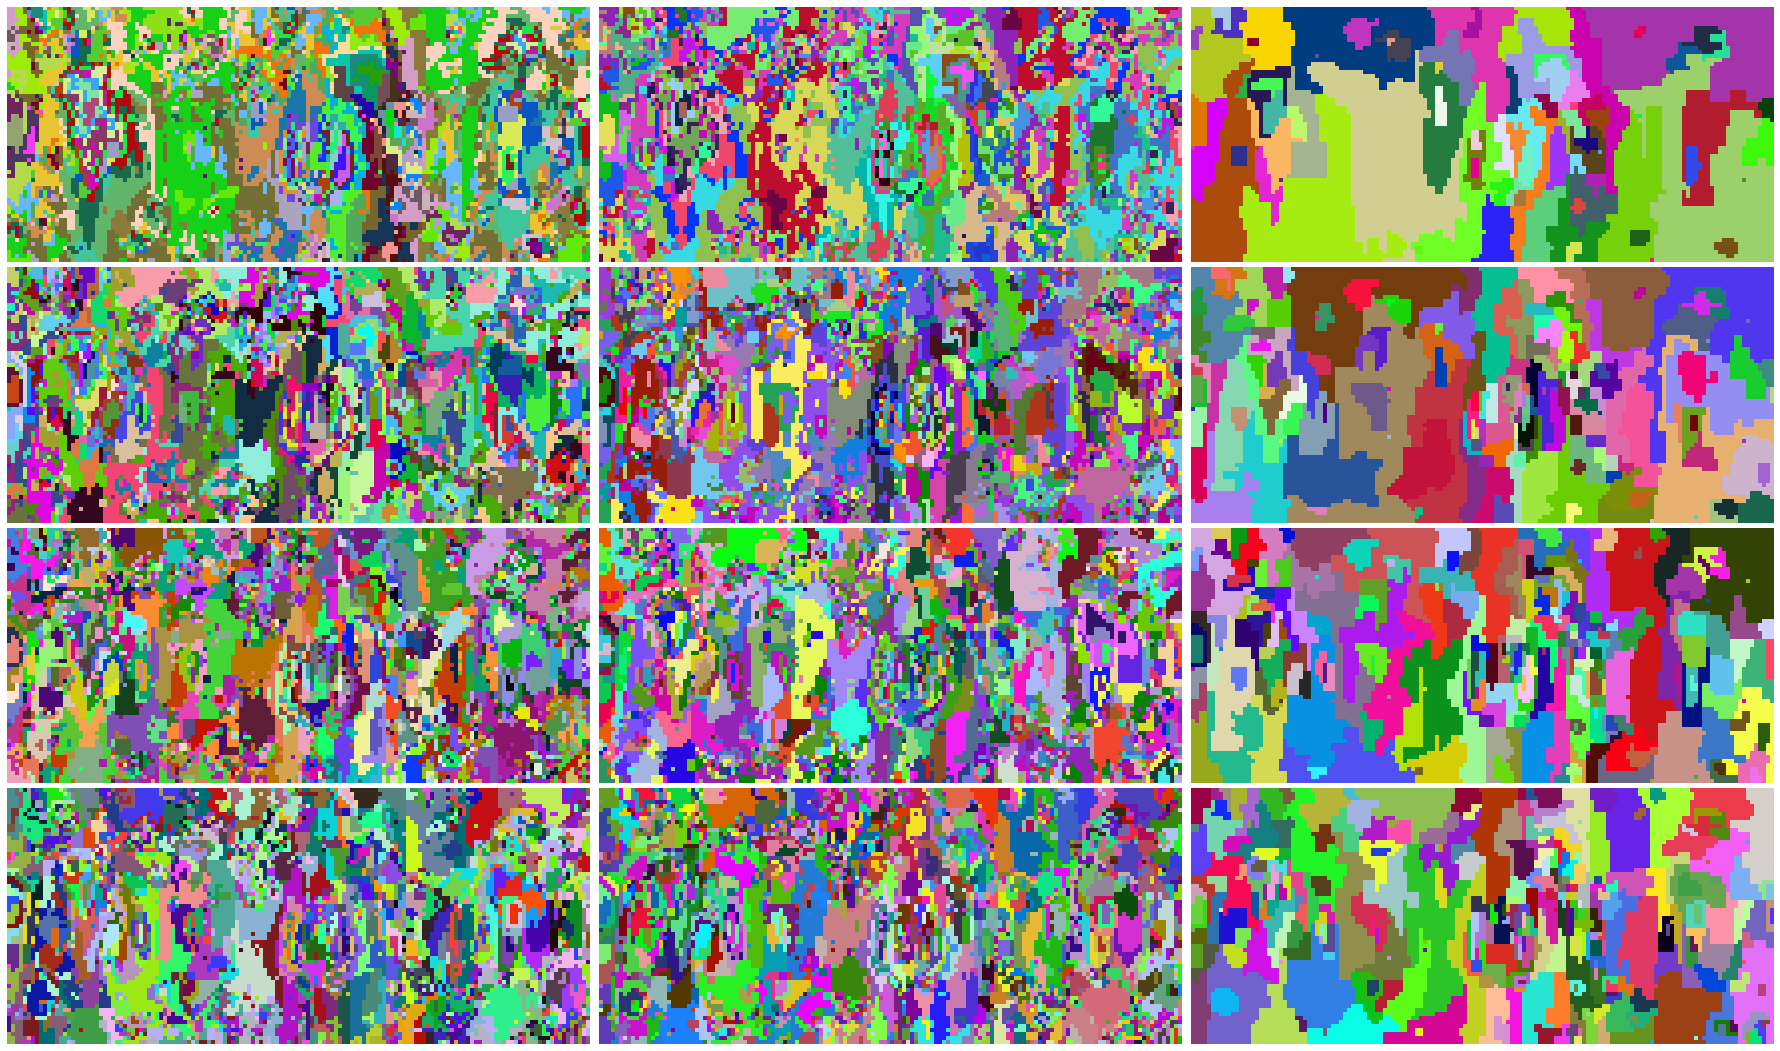

In [4]:
import matplotlib.pyplot as plt
import numpy as np

nx,ny=64,146
ratio=ny/nx

fig = plt.figure(constrained_layout=False,figsize=(12,12))
gs = fig.add_gridspec(nrows=4, ncols=3, left=0, right=0.9*ratio,bottom=0,top=1.2, wspace=0.002,hspace=0.02)
algs=('ap','kmean','hac')
n_pca=(4,8,12,16)
times=np.zeros((4,3))

for i in range(4):
    for j in range(3):
        labels,times[i,j]=np.load("full_%s_%i.npy"%(algs[j],n_pca[i]),allow_pickle=True)#[0]
        labels=labels.reshape((nx,ny))
        colors=np.random.uniform(size=(np.unique(labels).shape[0],3))
        print(colors.shape)
        im=np.zeros(tuple(list(labels.shape)+[3]))
        for k in range(nx):
            for l in range(ny):
                im[k,l]=colors[labels[k,l]]
        ax = fig.add_subplot(gs[i,j])
        ax.axis('off')
        ax.imshow(im)

plt.savefig('fig7.tif',format='tif',bbox_inches ='tight')

<Figure size 432x288 with 0 Axes>

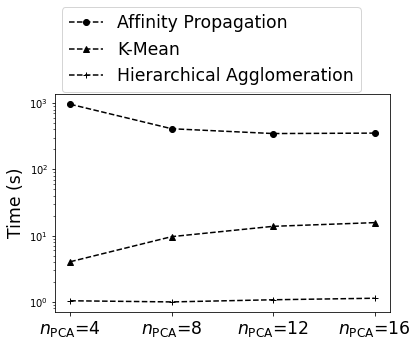

In [5]:
plt.clf()
fig, ax = plt.subplots()

ax.set_yscale('log')

#ax.set_xlabel("$n_{\mathrm{PCA}}$",size='xx-large')
ax.set_ylabel("Time (s)",size='xx-large')
ax.set_xticks((4,8,12,16))#,fontsize='xx-large') 
ax.set_xticklabels(['$n_{\mathrm{PCA}}$=4', '$n_{\mathrm{PCA}}$=8', '$n_{\mathrm{PCA}}$=12', '$n_{\mathrm{PCA}}$=16'],size='xx-large')



t0,=ax.plot(n_pca,times[:,0],'ko--')
t1,=ax.plot(n_pca,times[:,1],'k^--')
t2,=ax.plot(n_pca,times[:,2],'k+--')

ax.legend([t0,t1,t2],['Affinity Propagation','K-Mean','Hierarchical Agglomeration'],fontsize='xx-large',loc=(0.02,1.01))

plt.savefig('fig8.tif',format='tif',bbox_inches ='tight')